In [114]:
import xarray as xr, glob, re, os, pandas as pd, cartopy, matplotlib, matplotlib.pyplot as plt, datetime, numpy as np
matplotlib.rcParams['savefig.bbox'] = "tight" 

xn,xx,yn,yx = [-86,-55,10,25]
bxn,bxx,byn,byx = [-80,-60,12,18]
mapproj = cartopy.crs.PlateCarree()

# mismatch between surface & atmos grids, so no data
skip = ['KACE-1-0-G_r1i1p1f1', 'ACCESS-ESM1-5_r1i1p1f1', 'CAMS-CSM1-0_r1i1p1f1', 'INM-CM4-8_r1i1p1f1']


# Seasonal cycle of Caribbean PI


In [122]:
era5 = xr.open_dataset("data/ts-daily_pi_era5.nc").vmax

In [123]:
sc_era5 = era5.sel(time = slice("1990","2020")).groupby("time.month").mean()

In [124]:
fl = sorted(glob.glob("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/hurricane-melissa/potential-intensity/cmip6/caribbean_pi_*.nc"))
fl = [fnm for fnm in fl if not "_".join(fnm.split("_")[6:8]) in skip]

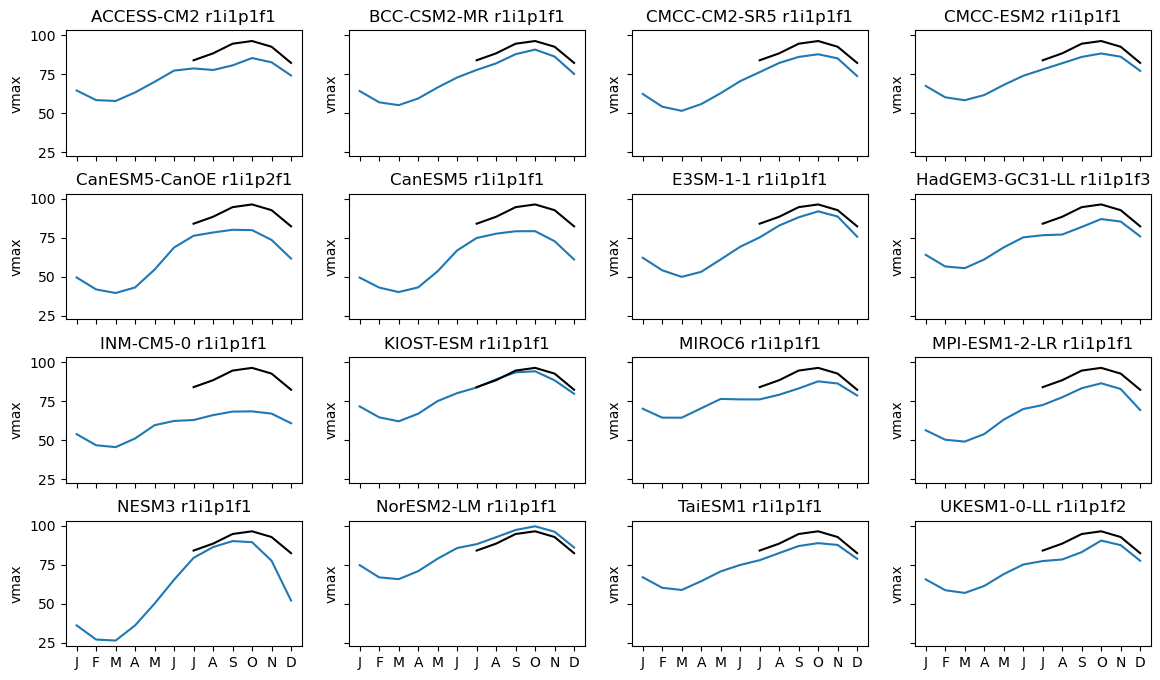

In [125]:
nc = 4; nr = int(np.ceil(len(fl) / nc))

fig, axs = plt.subplots(ncols = nc, nrows = nr, figsize = (nc * 3.5, nr * 2), dpi = 100, sharex = True, sharey = True)
plt.subplots_adjust(hspace = 0.3)
for i in range(len(fl)):
    ax = axs.flatten()[i]
    fnm = fl[i]
    ts = xr.open_dataset(fnm).vmax.sel(lon = slice(bxn,bxx), lat = slice(byn,byx), time = slice("1990","2020")).mean(["lat", "lon"])
    ts.groupby("time.month").mean().plot(ax = ax)
    ax.plot(sc_era5.month, sc_era5, color = "k")

    ax.set_title(" ".join(fnm.split("_")[6:8]))
    ax.set_xlabel("")
    ax.set_xticks(range(1,13))
    ax.set_xticklabels([datetime.datetime(2025,m,1).strftime("%b")[:1] for m in range(1,13)])

plt.savefig("mdl-eval/pi_cmip6_seasonal-cycle.png")

# Spatial pattern of October Caribbean PI

In [129]:
era5 = xr.open_dataset("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/hurricane-melissa/potential-intensity/pi-era5.nc").vmax
era5_sp = era5.sel(time = slice("1990","2020")).groupby("time.month")[10].mean(["time"])

fl = sorted(glob.glob("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/hurricane-melissa/potential-intensity/cmip6/caribbean_pi_*.nc"))
fl = [fnm for fnm in fl if not "_".join(fnm.split("_")[6:8]) in skip]

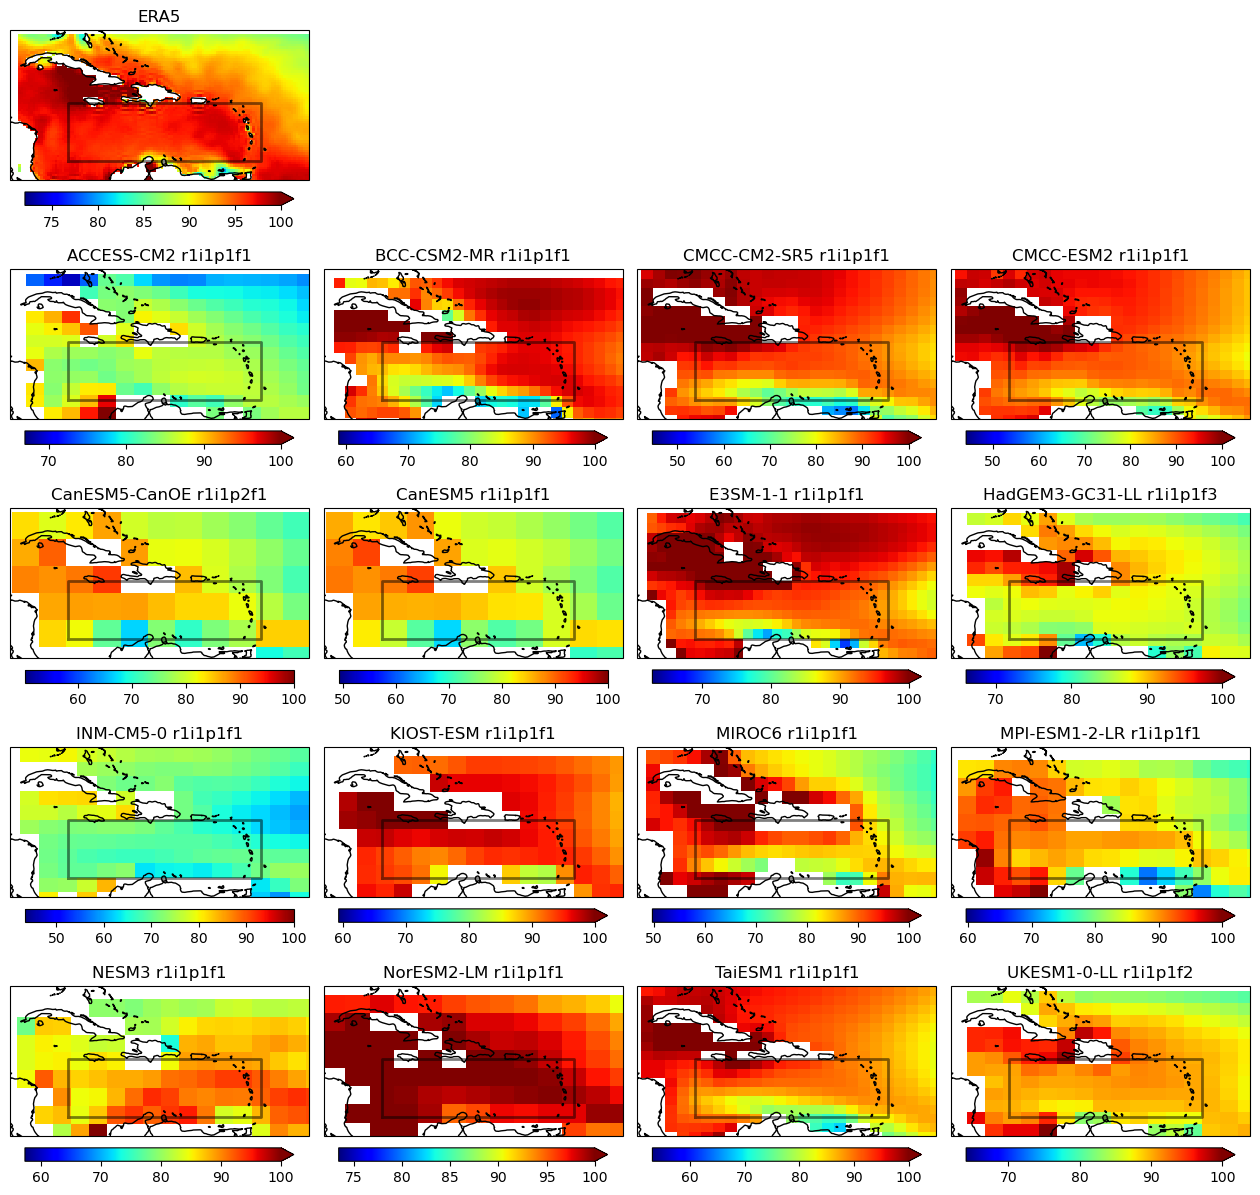

In [135]:
nc = 4; nr = int(np.ceil(len(fl) / nc))

fig, axs = plt.subplots(ncols = nc, nrows = nr+1, figsize = (nc * 4, (nr+1) * 3), dpi = 100, sharex = True, sharey = True,
                       subplot_kw = {"projection" : mapproj, "extent" : (xn,xx,yn,yx)})
plt.subplots_adjust(hspace = 0.2, wspace = 0.05)

plot_kwargs = {"cmap" : "jet", 
               # "vmin" : 75, 
               "vmax" : 100,
               "cbar_kwargs" : {"label" : "", "location" : "bottom", "pad" : 0.06, "shrink" : 0.9}}

ax = axs[0,0]
era5_sp.plot(ax = ax, **plot_kwargs)#, vmax = 100)
ax.plot([bxn,bxn,bxx,bxx,bxn], [byn,byx,byx,byn,byn], color = "k", lw = 2, alpha = 0.5)
ax.coastlines()
ax.set_title("ERA5")
for ax in axs[0,1:]: ax.set_axis_off()

for i in range(len(fl)):
    ax = axs[1:,:].flatten()[i]
    fnm = fl[i]
    da = xr.open_dataset(fnm).vmax.sel(time = slice("1990","2020")).groupby("time.month")[10].mean(["time"])

    da.plot(ax = ax, **plot_kwargs)

    ax.coastlines()
    ax.plot([bxn,bxn,bxx,bxx,bxn], [byn,byx,byx,byn,byn], color = "k", lw = 2, alpha = 0.5)
    ax.set_title(" ".join(fnm.split("_")[6:8]))

plt.savefig("mdl-eval/pi_cmip6_spatial-pattern.png")